Imports


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numeric_transformer = Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import joblib
import pandas as pd
import os
os.listdir("data")
['data', 'House_price_prediction.ipynb']
def get_params():
    return (name, age)  # not None
print(type(preprocessor))
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


NameError: name 'preprocessor' is not defined

🔴 DATASET

In [ ]:
df = pd.read_csv("data/House_Price.csv")
df.head()

,Area,Bedrooms,Price
0,1200,2,3500000
1,1500,3,5000000


🔴Number of rows & columns
🔴Target variable name (usually price)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Area      2 non-null      int64
 1   Bedrooms  2 non-null      int64
 2   Price     2 non-null      int64
dtypes: int64(3)
memory usage: 180.0 bytes


,Area,Bedrooms,Price
count,2.000000,2.000000,2.000000e+00
mean,1350.000000,2.500000,4.250000e+06
std,212.132034,0.707107,1.060660e+06
min,1200.000000,2.000000,3.500000e+06
25%,1275.000000,2.250000,3.875000e+06
50%,1350.000000,2.500000,4.250000e+06
75%,1425.000000,2.750000,4.625000e+06
max,1500.000000,3.000000,5.000000e+06


🔴 EDA (EXPLORATORY DATA ANALYSIS)


In [ ]:
df.isnull().sum()

Area        0
Bedrooms    0
Price       0
dtype: int64

🔴 VISUALIZATION


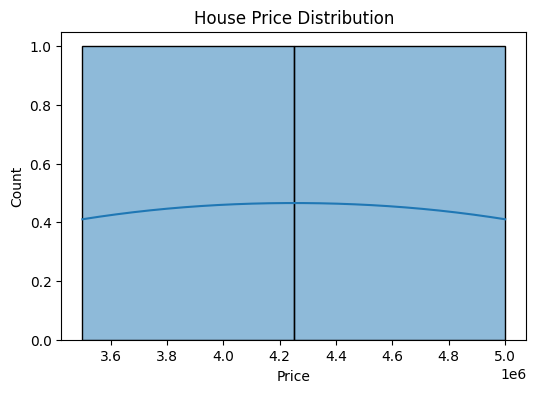

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title("House Price Distribution")
plt.show()

🔴CORRELATION (PRICE DISTRIBUTION
)

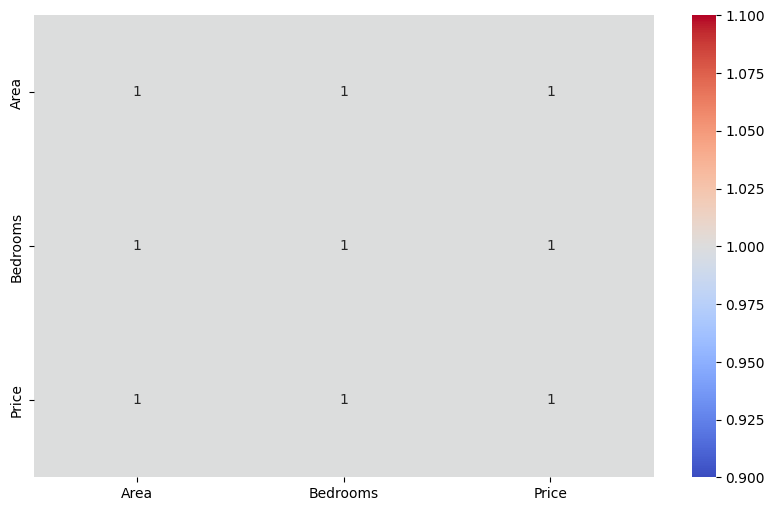

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

🔴FEATURE ENGINEERING

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

🔴IDENTIFY COLUMNS

In [ ]:
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

🔴PROCESSING PIPELINE


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', pd.get_dummies, cat_features)
    ],
    remainder='drop'
)

🔴TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

🔴MODEL COMPARASION

1. LINEAR REGRESSION 

In [ ]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

model = LinearRegression()
model.fit(X_train_enc, y_train)
y_pred = model.predict(X_test_enc)

2. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_enc, y_train)
rf_pred = rf_model.predict(X_test_enc)

3. GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train_enc, y_train)
gb_pred = gb_model.predict(X_test_enc)

🔴EVALUATION

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

EVALUATE

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

NameError: name 'lr_pred' is not defined

🔴RESIDUAL ANALYSIS

In [ ]:
residuals = y_test - gb_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

🔴SAVE BEST MODEL

In [ ]:
joblib.dump(gb_pipeline, "models/house_price_model.pkl")

🔴PREDICTION CELL 


In [ ]:
loaded_model = joblib.load("models/house_price_model.pkl")

sample_input = X.iloc[[0]]
loaded_model.predict(sample_input)